## 0. Current Process on Building Class "analyzer"

This shows the current work process on building new class "analyzer", by now the initialization part and first two features are done. **a copy of code below is stored into analyzer.py to test how it runs on terminal**

In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import datafetchtools #I tried to put two functions dedicated for downloading and unzipping the data into a .py file

class analyzer:
    def __init__(self):
        # Indicate paths and creates lists for column names
        self.gzipPath="..\\downloads\\MovieSummaries.tar.gz"
        self.movieMetaDataPath="..\\data\\MovieSummaries\\movie.metadata.tsv"
        self.movieMetaDataColumns=['wikiID', 'fbID', 'movieName', 'releaseDate', 'boxRevenue', 'runtime', 'language', 'country', 'genre']
        self.characterMetaDataPath="..\\data\\MovieSummaries\\character.metadata.tsv"
        self.characterMetaDataColumns=['wikiID', 'fbID', 'releaseDate', 'characterName', 'actorBirthday', 'actorGender', 'actorHeight', 
                                       'actorEthnicityID','actorName', 'ageAtRelease', 'fbMapID', 'fbCharacterID','fbActorID']
        
        try:
            # try to load datasets
            print("Connceting to the datasets ...")
            self.movieData=pd.read_csv(self.movieMetaDataPath, sep="\t", names=self.movieMetaDataColumns, on_bad_lines='skip')
            self.characterData=pd.read_csv(self.characterMetaDataPath, sep="\t", names=self.characterMetaDataColumns, on_bad_lines='skip')
            
        except:
            # if the datasets don't exist in the local directory
            datafetchtools.downloadData("https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz", self.gzipPath)
            datafetchtools.extractData("..\\downloads\\MovieSummaries.tar.gz", "..\\data")
        finally:
            # load again
            self.movieData=pd.read_csv(self.movieMetaDataPath, sep="\t", names=self.movieMetaDataColumns, on_bad_lines='skip')
            self.characterData=pd.read_csv(self.characterMetaDataPath, sep="\t", names=self.characterMetaDataColumns, on_bad_lines='skip')
            print("Successfully connected to the datasets")

    def movie_type(self, N=10):
        # Take the column "genres" out and form lists using the values of dictionary 
        genres=self.movieData.genre.apply(lambda x: list(ast.literal_eval(x).values()))
        # A native feature of pandas that breaks down column made of list into new entries
        genresExploded=genres.explode(ignore_index=True)
        return genresExploded.value_counts()[1:N]
    
    def actor_count(self):
        # 1. Use value_counts() to count how many times a wikiID occurs in the Character dataset
        # 2. Create a new dataframe using .join(), having columns: wikiID, movieName, actorCounts
        countData=self.movieData[["wikiID", "movieName"]].join(self.characterData['wikiID'].value_counts().astype("Int64"), on="wikiID")
        countData.rename(columns={"count": "actorCounts"}, inplace=True)
        # Make sure can be executed in terminal and return a figue
        plt.figure(figsize=(12, 6))
        sns.histplot(data=countData,x="actorCounts",bins=40)
        plt.show()


Connceting to the datasets ...
Successfully connected to the datasets


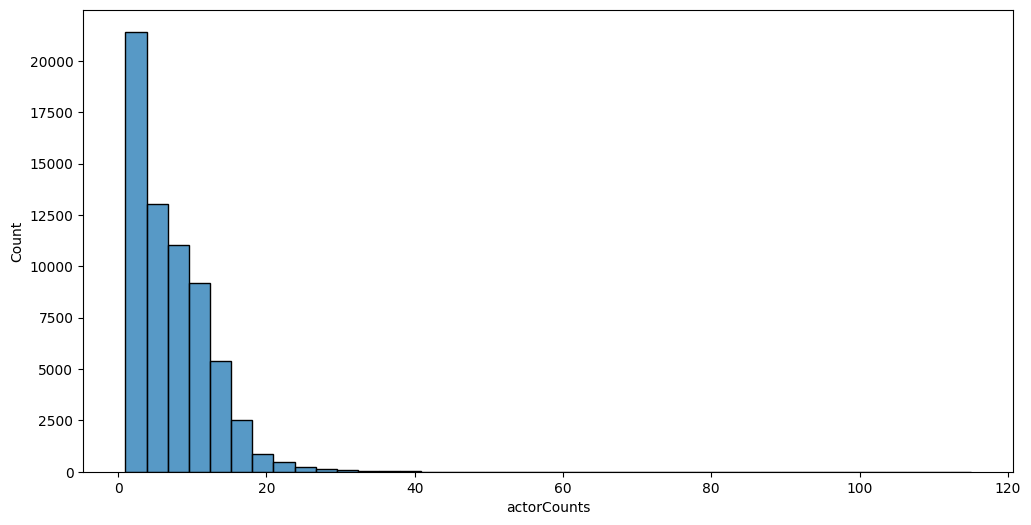

In [4]:
analyzer().actor_count()

## 1. Finding solutions for required features in Jupyter environment

This part is used to load data, process them, and get ideal result as usual in a .ipynb environment. `dfm` and `dfc` are correctly loaded movie data and character data (same as those in the class "analyzer")

In [51]:
dfm=pd.read_csv("..\\data\\MovieSummaries\\movie.metadata.tsv", 
               sep="\t", 
               names=['wikiID', 'fbID', 'movieName', 'releaseDate', 'boxRevenue', 'runtime', 'language', 'country', 'genre'])

In [52]:
dfc=pd.read_csv("..\\data\\MovieSummaries\\character.metadata.tsv", 
               sep="\t", 
               names=['wikiID', 'fbID', 'releaseDate', 'characterName', 'actorBirthday', 'actorGender', 'actorHeight',
                      'actorEthnicityID','actorName', 'ageAtRelease', 'fbMapID', 'fbCharacterID','fbActorID'])

In [89]:
df_ac=dfm[["wikiID", "movieName"]].join(dfc['wikiID'].value_counts().astype("Int64"), on="wikiID")
df_ac.rename(columns={"count": "actorCounts"}, inplace=True)

<Axes: xlabel='actorCounts', ylabel='Count'>

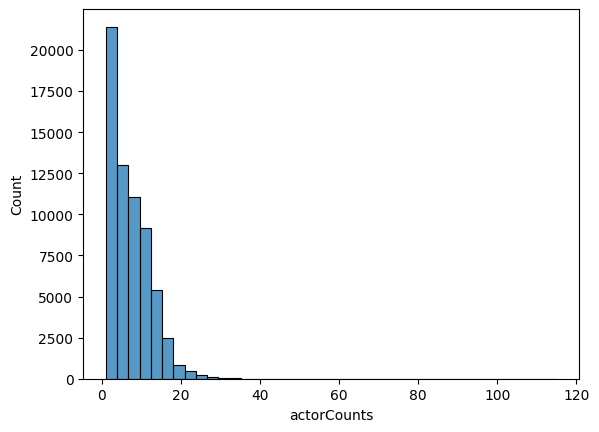

In [90]:
sns.histplot(data=df_ac,x="actorCounts",bins=40)

In [92]:
dfm["genre"].apply(lambda x: list(ast.literal_eval(x).values())).explode(ignore_index=True).value_counts()[0:10]

genre
Drama              34007
Comedy             16349
Romance Film       10234
Black-and-white     9094
Action              8798
Thriller            8744
Short Film          8141
World cinema        7155
Crime Fiction       6948
Indie               6897
Name: count, dtype: int64

In [93]:
dfm.releaseDate.str[0:4]

0        2001
1        2000
2        1988
3        1987
4        1983
         ... 
81736    2011
81737    2011
81738    1972
81739    1992
81740    2002
Name: releaseDate, Length: 81741, dtype: object

In [ ]:
dfm.genre=dfm.genre.apply(lambda x: list(ast.literal_eval(x).values()))
#df.language=df.language.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)